In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import pickle as pkl
import cv2 as cv
import os
from sklearn import datasets

In [16]:
def createDataFrame(myDir):
    dataframe = pd.DataFrame(columns=['label', 'img_hsv'])
    for mroot, mdirs, mfiles in os.walk(myDir):
        for dir in mdirs:
            label = dir
            print(label)
            for root, dirs, files in os.walk(mroot+'\\'+dir):
                for file in files:
                    img = cv.imread(root+'\\'+file)
                    imgresize = cv.resize(img, (80, 80))
                    #traitement de l'image
                    gray = cv.cvtColor(imgresize, cv.COLOR_BGR2GRAY)
                    dataframe = dataframe.append({'label': label, 'gray': gray}, ignore_index=True)
    return dataframe
    

In [17]:
DataFrame=createDataFrame('./dataset/Training/')

Banana
Kiwi


In [18]:
DataFrame.head()

,label,img_hsv,gray
0,Banana,NaN,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,Banana,NaN,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,Banana,NaN,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,Banana,NaN,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,Banana,NaN,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


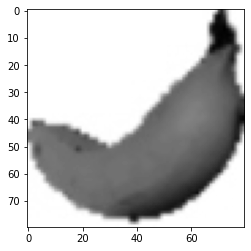

In [19]:
size = 80

plt.imshow(DataFrame.iloc[0]['gray'], cmap='gray')

In [20]:
#transforme le DataFrame en un tableau de photo X et un tableau de label y
X = list(DataFrame['gray'])
y = list(DataFrame['label'])
print(X)
n_samples = len(DataFrame['gray'])
print(n_samples)
print(len(X[0]))

#X = np.reshape(X, (-1, 2))
print(len(X))
#X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(DataFrame['gray'], DataFrame['label'], test_size=0.2, random_state=42)

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [21]:
#transforme les données en vecteur colonne (1D)
print(len(X[0]), type(X[0]))
print(len(X))
for i in range(len(X)):
    X[i] = X[i].flatten()
print(len(X[0]))

80 <class 'numpy.ndarray'>
956
6400


In [22]:
#plt.imshow(X[0], cmap='gray')
#plt.imshow(X[1], cmap='gray')

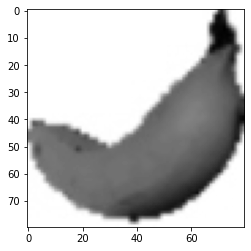

In [23]:
plt.imshow(X[0].reshape(size, size), cmap='gray')

In [24]:
from sklearn import svm
clf = svm.SVC(gamma=0.01, C=10)
# print()
# print(y.shape)
# print(X[1].shape)
clf.fit(X, y)
clf.score(X, y)


1.0

Banana
Kiwi


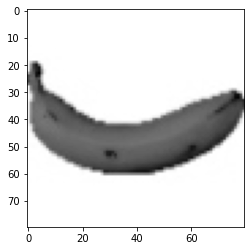

In [25]:
DataFrameTest=createDataFrame('./dataset/Test/')
plt.imshow(DataFrameTest.iloc[0]['gray'], cmap='gray')

In [26]:
#transforme le DataFrame en un tableau de photo X et un tableau de label y
X_train = list(DataFrameTest['gray'])
y_train = list(DataFrameTest['label'])
print(X_train)
n_samples = len(DataFrameTest['gray'])
print(n_samples)
print(len(X_train[0]))
print(len(X_train))

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [27]:
#transforme les données en vecteur colonne (1D)
print(len(X_train[0]), type(X_train[0]))
print(len(X_train))
for i in range(len(X_train)):
    X_train[i] = X_train[i].flatten()
print(len(X_train[0]))

80 <class 'numpy.ndarray'>
322
6400


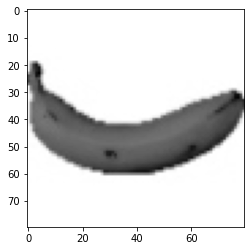

In [28]:
plt.imshow(X_train[0].reshape(size, size), cmap='gray')

In [30]:
clf.predict(X_train)
clf.score(X_train, y_train)

0.515527950310559